Plots: TracerPlotter
====================

This example illustrates how to plot a `Tracer` using a `TracerPlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets create a `Tracer`.

In [2]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllIsothermal(
        centre=(0.0, 0.0), einstein_radius=1.6, elliptical_comps=(0.2, 0.2)
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.SphSersic(
        centre=(0.1, 0.1), intensity=0.3, effective_radius=1.0, sersic_index=2.5
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

We also need an image-plane `Grid2D` which we'll ray-trace via the `Tracer`.

In [3]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

We now pass the tracer` and grid to a `TracerPlotter` and call various `figure_*` methods to plot different attributes.

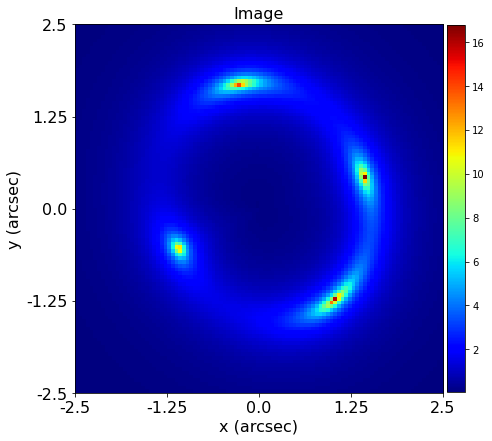

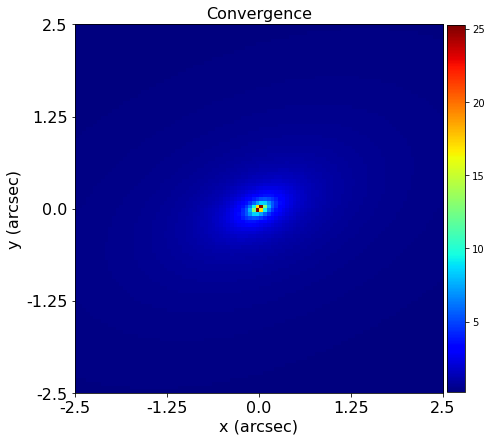

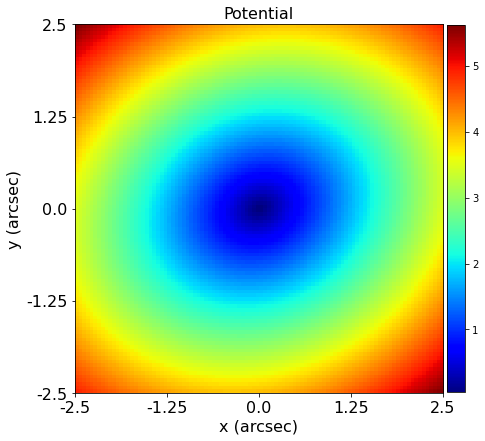

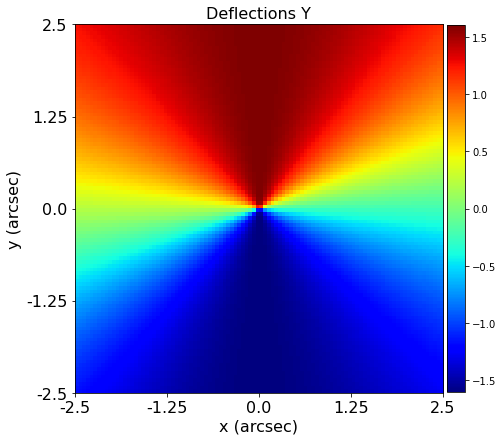

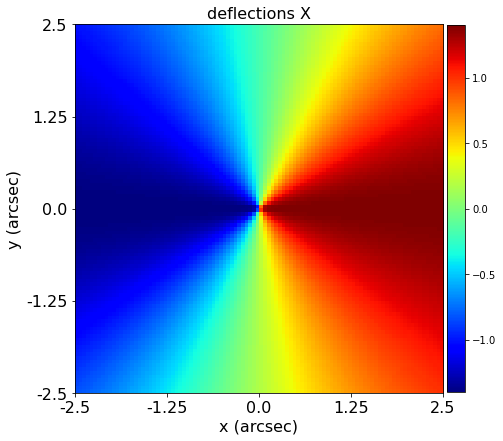

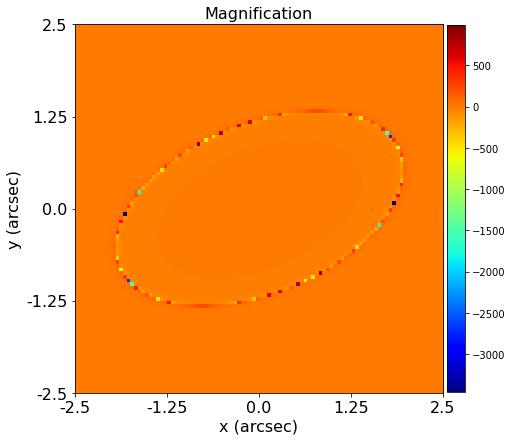

In [4]:
tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracer_plotter.figures_2d(
    image=True,
    convergence=True,
    potential=True,
    deflections_y=True,
    deflections_x=True,
    magnification=True,
)

A `Tracer` and its `Grid2D` contains the following attributes which can be plotted automatically via 
the `Include2D` object.

(By default, a `Grid2D` does not contain a `Mask2D`, we therefore manually created a `Grid2D` with a mask to illustrate
plotting its mask and border below).

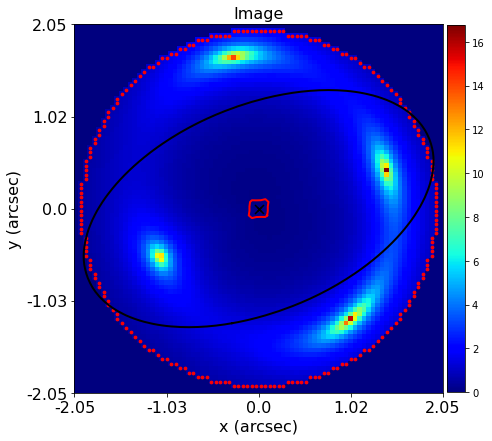

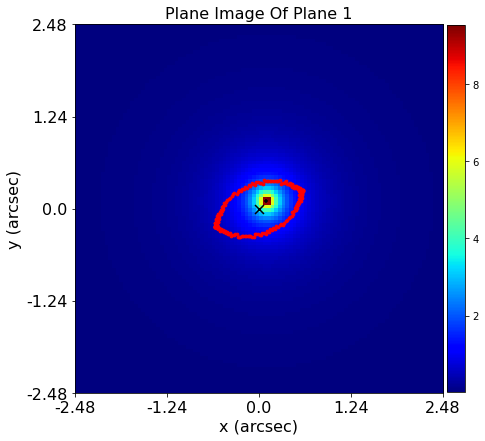

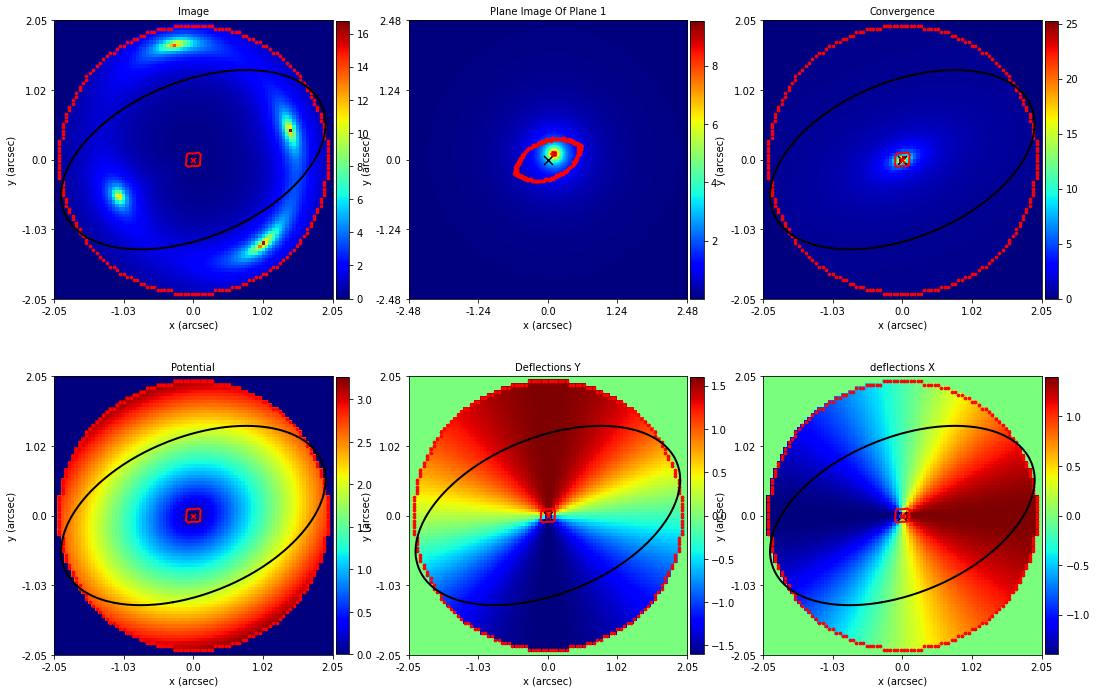

In [5]:
mask = al.Mask2D.circular(
    shape_native=grid.shape_native, pixel_scales=grid.pixel_scales, radius=2.0
)
masked_grid = al.Grid2D.from_mask(mask=mask)

include_2d = aplt.Include2D(
    origin=True,
    mask=True,
    border=True,
    light_profile_centres=True,
    mass_profile_centres=True,
    critical_curves=True,
)
tracer_plotter = aplt.TracerPlotter(
    tracer=tracer, grid=masked_grid, include_2d=include_2d
)
tracer_plotter.figures_2d(image=True, source_plane=True)
tracer_plotter.subplot_tracer()

Whereas a `PlanePlotter` had a method to plot its `plane_image`, it did not know the caustics of the source-plane as
they depend on the `MassProfile`'s of `Galaxy`'s in lower redshift planes. When we plot a plane image with a `Tracer`,
this information is now available and thus the caustics of the source-plane are now plotted.

The same is true of the `border, where the `border` plotted on the image-plane image has been ray-traced to the 
source-plane. This is noteworthy as it means in the source-plane we can see where our entire masked region traces too.

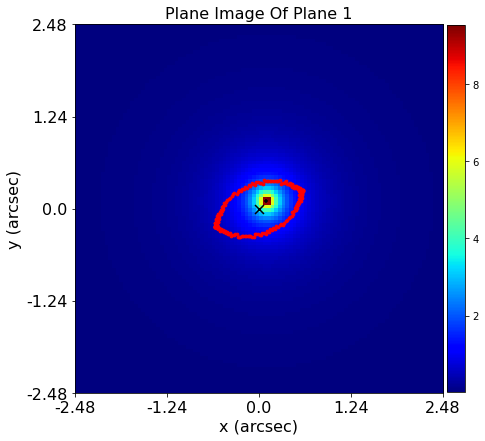

In [6]:
tracer_plotter.figures_2d_of_planes(plane_image=True, plane_index=1)

Finish.